<a href="https://colab.research.google.com/github/PranavBharadwaj-1328/FaceMaskDetection/blob/main/maskdetect_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
trained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(224,224,3), include_top=False, weights="imagenet")

In [ ]:
for layer in trained_model.layers:
  layer.trainable = False
last_layer = trained_model.get_layer('mixed10')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 5, 5, 2048)


In [ ]:
x = layers.AveragePooling2D(pool_size=(5,5))(last_output)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(trained_model.input, x)
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

In [ ]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1034 (Conv2D)           (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1034 (Batc  (None, 111, 111, 32  96         ['conv2d_1034[0][0]']            
 hNormalization)                )                                                          

In [ ]:
base = '/content/drive/MyDrive/data'
train = os.path.join(base,'Train')
test = os.path.join(base,'Test')

In [ ]:
train_settings = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
test_settings = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
train_generator = train_settings.flow_from_directory(train,
                                                    batch_size = 64,
                                                    class_mode = 'binary',
                                                    target_size=(224,224))
test_generator = test_settings.flow_from_directory(test,
                                                  batch_size = 20,
                                                  class_mode = 'binary',
                                                  target_size=(224,224))

Found 2342 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=10,
                    shuffle=True,
                    epochs=10,
                    validation_steps=5,
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 102s 8s/step - loss: 0.4948 - binary_accuracy: 0.7606 - val_loss: 0.1681 - val_binary_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 84s 8s/step - loss: 0.2982 - binary_accuracy: 0.8779 - val_loss: 0.1146 - val_binary_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 85s 8s/step - loss: 0.2352 - binary_accuracy: 0.9266 - val_loss: 0.0791 - val_binary_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 85s 9s/step - loss: 0.2111 - binary_accuracy: 0.9219 - val_loss: 0.0501 - val_binary_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 87s 9s/step - loss: 0.1596 - binary_accuracy: 0.9453 - val_loss: 0.0406 - val_binary_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 85s 9s/step - loss: 0.1511 - binary_accuracy: 0.9516 - val_loss: 0.0257 - val_binary_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 84s 8s/step - loss: 0.1

In [ ]:
print('Accuracy:'+ str(history.history['binary_accuracy']))
print('Loss:'+ str(history.history['loss']))
print('Validation accuracy:'+ str(history.history['val_binary_accuracy']))
print('Validation loss:'+ str(history.history['val_loss']))

Accuracy:[0.7605863213539124, 0.8778501749038696, 0.926562488079071, 0.921875, 0.9453125, 0.9515625238418579, 0.949999988079071, 0.965624988079071, 0.956250011920929, 0.9609120488166809]
Loss:[0.49478036165237427, 0.29815179109573364, 0.23520246148109436, 0.21109004318714142, 0.15961553156375885, 0.15110664069652557, 0.1375630795955658, 0.10249169170856476, 0.1207110732793808, 0.10963837802410126]
Validation accuracy:[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation loss:[0.16808804869651794, 0.11464991420507431, 0.07910455018281937, 0.05005000904202461, 0.04058914631605148, 0.025698909536004066, 0.024872498586773872, 0.020664799958467484, 0.017170477658510208, 0.017378345131874084]


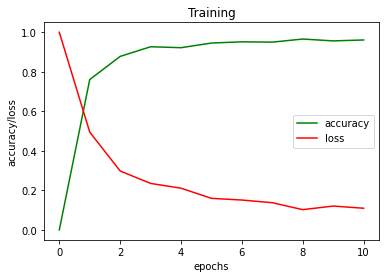

In [ ]:
import matplotlib.pyplot as plt
epochs = [0,1,2,3,4,5,6,7,8,9,10]
plt.title('Training')
plt.plot(epochs,[0]+history.history['binary_accuracy'],'g-')
plt.plot(epochs,[1]+history.history['loss'],'r-')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='center right')
plt.show()


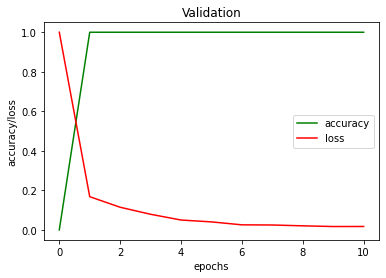

In [ ]:
plt.title('Validation')
plt.plot(epochs,[0]+history.history['val_binary_accuracy'],'g-')
plt.plot(epochs,[1]+history.history['val_loss'],'r-')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='center right')
plt.show()